## CNN aplicado al dataset CIFAR-10

Autor : Pablo Gonzalez  
Fecha : 4/10/2025

In [1]:
#Imports
import sys
sys.path.append("../src") 
import models, data, utils
import importlib
importlib.reload(models)
importlib.reload(data)
importlib.reload(utils)
from data import load_cifar10, get_data_shape, preprocess_data, get_class_names, data_augmentation
from models import CnnModel
from utils import plot_training_curves

In [2]:
import matplotlib.pyplot as plt
import numpy as np

#### Data processing

In [3]:
#laod of data cifar10
train_images, train_labels, test_images, test_labels = load_cifar10()

Vemos el shape de los datos de entrenamiento y etiquetas

In [4]:
#imprimimos el shape de la division de datos
print(f"train_images shape: {get_data_shape(train_images)}")
print(f"train_labels shape: {get_data_shape(train_labels)}")
print(f"test_images shape: {get_data_shape(test_images)}")
print(f"test_labels shape: {get_data_shape(test_labels)}")

train_images shape: (50000, 32, 32, 3)
train_labels shape: (50000, 1)
test_images shape: (10000, 32, 32, 3)
test_labels shape: (10000, 1)


Normalizamos los pixeles de las imágenes y convertimos las etiquetas a categoricas

In [5]:
train_images, train_labels = preprocess_data(train_images,train_labels,10)
test_images, test_labels = preprocess_data(test_images,test_labels,10)

In [6]:
class_names = get_class_names()
print(class_names)

['avion', 'automovil', 'pajaro', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camion']


Realizamos una augmentacion de datos para evitar sobreajuste y mejorar la generalizacion del modelo

In [7]:
datagen = data_augmentation(rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True)
datagen.fit(train_images)

Visualizamos algunas imagenes del modelo

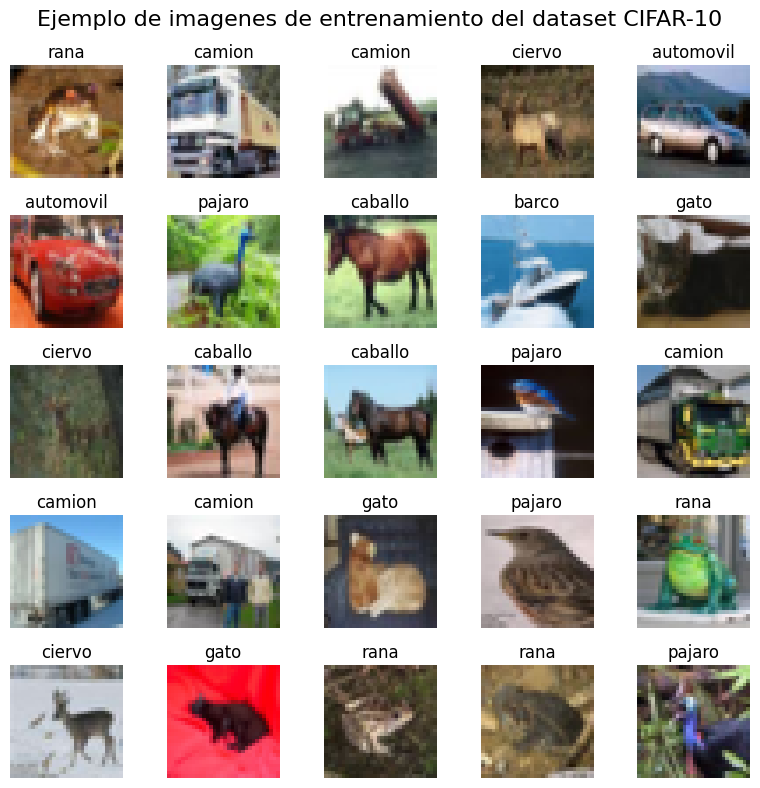

In [8]:
plt.figure(figsize=(8,8))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.title(class_names[np.argmax(train_labels[i])])
  plt.axis("off")
plt.suptitle("Ejemplo de imagenes de entrenamiento del dataset CIFAR-10",fontsize=16)
plt.tight_layout()
plt.show()

Definimos nuestro modelo CNN declarado en models.py

In [9]:
cnnModel = CnnModel((32,32,3),10)
cnnModel.build()

<Sequential name=sequential_1, built=True>

Vemos como esta compuesto el modelo

In [10]:
cnnModel.summary()

Resumen del modelo:
-----------------------------------


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

-----------------------------------


In [11]:
#compilamos el modelo
cnnModel.compile(optimizer="adam",
                 loss="categorical_crossentropy",metrics=["accuracy"])

Modelo compilado exitosamente.


Entrenamos nuestro modelo con los datos de entrenamiento y validacion

In [12]:
history=cnnModel.model.fit(
    datagen.flow(train_images, train_labels),
    epochs=35,
    validation_data=(test_images, test_labels)
)

Epoch 1/35


c:\Users\pgsan\OneDrive\Desktop\AprendizajeProfundo\project-ml-portfolio\portfolio\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.4094 - loss: 1.6038 - val_accuracy: 0.5360 - val_loss: 1.3109
Epoch 2/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.5451 - loss: 1.2766 - val_accuracy: 0.5884 - val_loss: 1.1718
Epoch 3/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.5900 - loss: 1.1557 - val_accuracy: 0.6520 - val_loss: 0.9747
Epoch 4/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.6238 - loss: 1.0661 - val_accuracy: 0.6552 - val_loss: 0.9865
Epoch 5/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.6426 - loss: 1.0111 - val_accuracy: 0.6840 - val_loss: 0.9163
Epoch 6/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.6631 - loss: 0.9650 - val_accuracy: 0.7111 - val_loss: 0.8565
Epoch 7/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.6770 - loss: 0.9298 - val_accuracy: 0.7031 - val_loss: 0.8733
Epoch 8/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.6863 - loss: 0.89

Graficamos la curva de precision y perdida en el entrenamiento y validacion

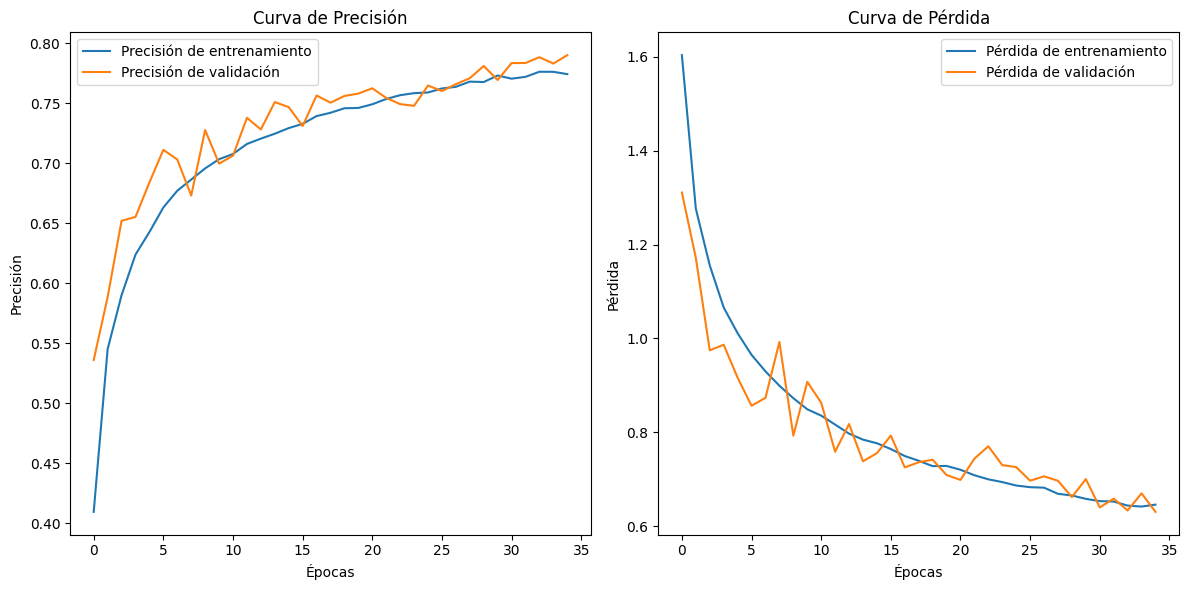

In [13]:
plot_training_curves(history)

Graficamos las primeras 15 imagenes del test para ver los resultados de la prediccion vs la etiqueta real

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


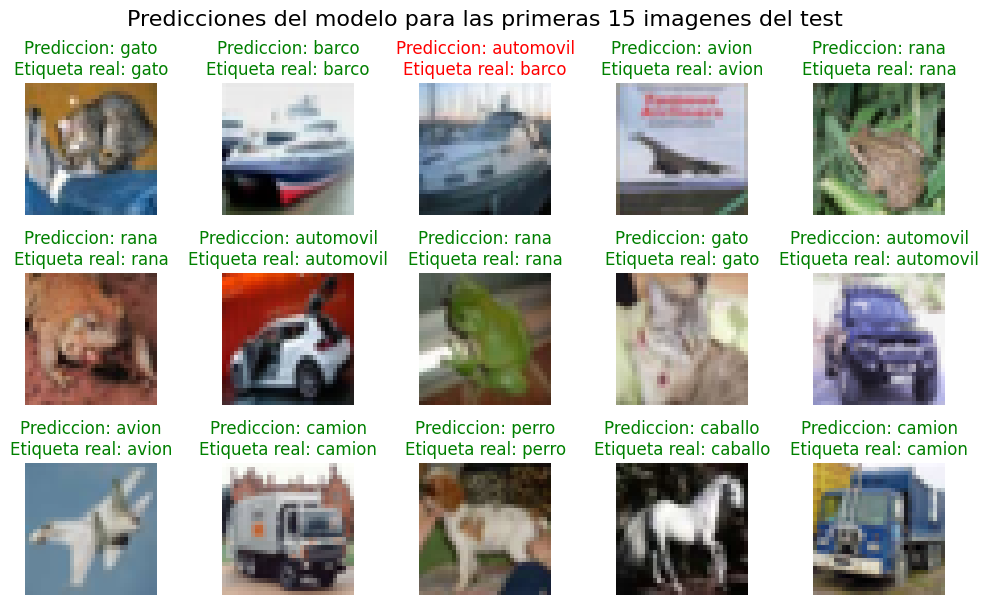

In [14]:
predictions = cnnModel.model.predict(test_images[:15])
plt.figure(figsize=(10,10))
for i in range(15):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[i])
  predicted_class = np.argmax(predictions[i])
  true_label = np.argmax(test_labels[i])
  color = 'green' if predicted_class == true_label else 'red'
  plt.title(f"Prediccion: {class_names[predicted_class]}\nEtiqueta real: {class_names[true_label]}",color=color)
  plt.axis('off')

plt.suptitle("Predicciones del modelo para las primeras 15 imagenes del test",fontsize=16)
plt.tight_layout()
plt.show()

Graficamos nuestra matriz de confusion

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


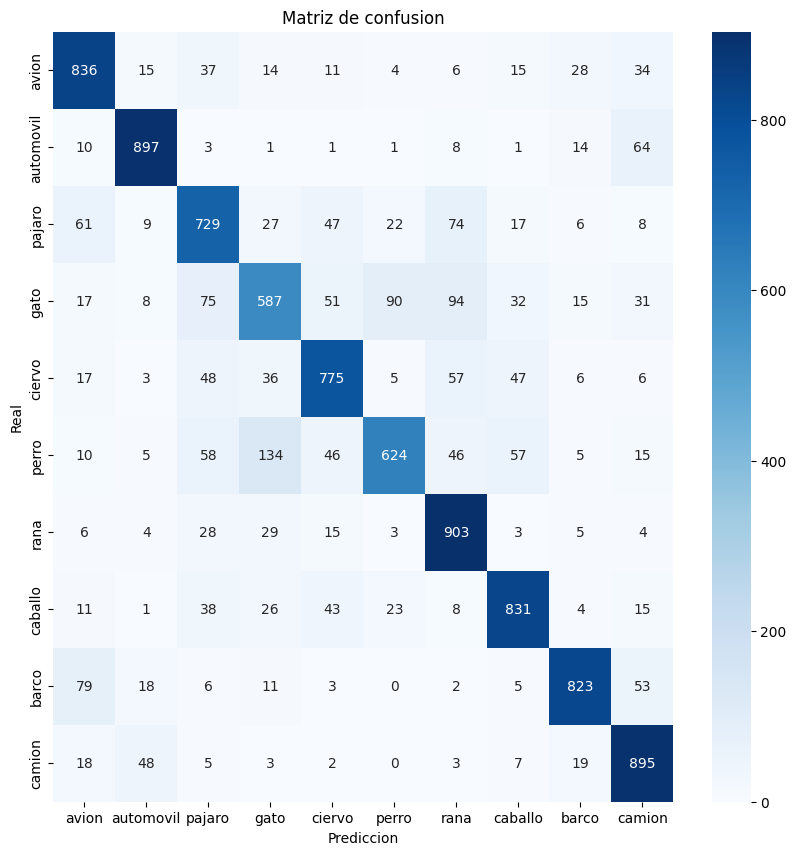

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
predicted_labels = np.argmax(cnnModel.model.predict(test_images),axis=1)
cm = confusion_matrix(np.argmax(test_labels,axis=1),predicted_labels)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d', cmap='Blues',xticklabels=class_names,yticklabels=class_names)
plt.title('Matriz de confusion')
plt.xlabel('Prediccion')
plt.ylabel('Real')
plt.show()

Observamos que las clases mas dificiles de clasificar son los perros que se confunden con gatos

In [16]:
#precision en entrenamiento y validacion
train_loss, train_acc = cnnModel.model.evaluate(train_images,train_labels)
val_loss, val_acc = cnnModel.model.evaluate(test_images,test_labels)
print(f"Precision en entrenamiento: {train_acc}")
print(f"Precision en validacion: {val_acc}")
print(f"Perdida en entrenamiento: {train_loss}")
print(f"Perdida en validacion: {val_loss}")


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8248 - loss: 0.4989
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7900 - loss: 0.6303
Precision en entrenamiento: 0.8247600197792053
Precision en validacion: 0.7900000214576721
Perdida en entrenamiento: 0.49889519810676575
Perdida en validacion: 0.6303061246871948


Reportamos las metricas de precision, recall y f1-score en results

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(np.argmax(test_labels,axis=1), predicted_labels, output_dict=True)
# Puedes elegir el promedio 'weighted' o 'macro'
row = {
    'modelo': 'CnnCifa10',
    'accuracy': val_acc,
    'F1': report['weighted avg']['f1-score'],
    'precision': report['weighted avg']['precision'],
    'recall': report['weighted avg']['recall'],
    'loss': val_loss,
    'epochs': 35
}

# Guardamos en el siguiente path
csv_path = "../results/summary.csv"
try:
    results = pd.read_csv(csv_path)
except FileNotFoundError:
    results = pd.DataFrame(columns=row.keys())

results = pd.concat([results, pd.DataFrame([row])], ignore_index=True)
results.to_csv(csv_path, index=False)

C:\Users\pgsan\AppData\Local\Temp\ipykernel_7160\1931475607.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([row])], ignore_index=True)


Conclusion

Podemos observar que la precision de validacion es de 0.79 y la de entrenamiento es 0.82. Nuestro modelo esta generalizando bien, ya que la diferencia entre ambas es pequeña.
En cuanto a la perdida, la de validacion es de 0.63 y la de entrenamiento es 0.49, lo que indica el modelo esta aprendiendo y no esta sobreajustando esto puede indicar que quizas el modelo pueda aprender mejor si se entrena por mas epocas con un early stopping y se agrega algun tipo de regularizacion(lasso o ridge) a parte del dropout para poder mejorar la precision y reducir la perdida.